<a href="https://colab.research.google.com/github/AI-AVENGER-S/ML-Practices/blob/main/Pytorch_CV_chest_xray_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
import os


os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 98% 2.25G/2.29G [00:30<00:00, 48.1MB/s]
100% 2.29G/2.29G [00:30<00:00, 79.6MB/s]


In [5]:
import zipfile
import os

zip_path = 'chest-xray-pneumonia.zip'
extract_path = 'chest_xray_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print('распаковка сделана')

распаковка сделана


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_data(dataset, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        idx = np.random.randint(0, len(dataset))
        img, label = dataset[idx]

        img = img.permute(1, 2, 0).numpy()
        img = img * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
        img = np.clip(img, 0, 1)

        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title('Pneumonia' if label == 1 else 'Normal')
        plt.axis('off')
    plt.show()

In [6]:
base_path = 'chest_xray_data/chest_xray/chest_xray'
train_dir = os.path.join(base_path, 'train')
test_dir = os.path.join(base_path, 'test')
val_dir = os.path.join(base_path, 'val')

In [8]:
train_dir

'chest_xray_data/chest_xray/chest_xray/train'

In [13]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms)
val_dataset = datasets.ImageFolder(val_dir, transform=data_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"всего папок : {train_dataset.classes}")
print(f"картинок для обучения: {len(train_dataset)}")
print(f"картинок для валидации: {len(val_dataset)}")
print(f"картинок для теста: {len(test_dataset)}")

всего папок : ['NORMAL', 'PNEUMONIA']
картинок для обучения: 5216
картинок для валидации: 16
картинок для теста: 624


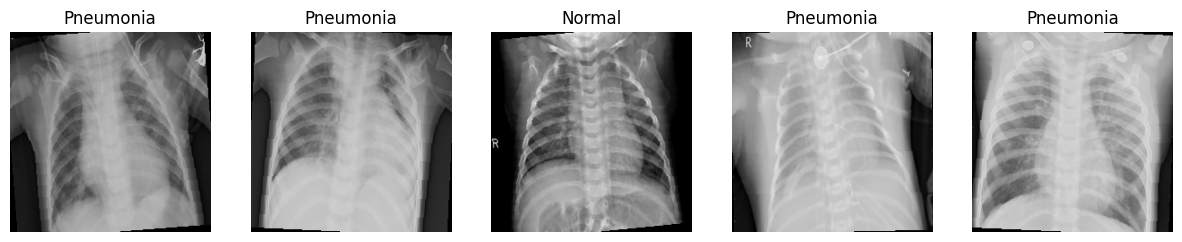

In [14]:
visualize_data(train_dataset, n=5)